In [58]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("../data/initial_data/frmgham2_project_data.csv")

In [21]:
df_3 = df[df['PERIOD'] == 3]

In [22]:
df_3 = df_3[[col for col in df_3.columns if not re.match("TIME",col) and not col in ['RANDID','PERIOD','DEATH']]]

In [23]:
missings = df_3.isna().sum().to_frame()
missings

,0
SEX,0
TOTCHOL,214
AGE,0
SYSBP,0
DIABP,0
CURSMOKE,0
CIGPDAY,14
BMI,17
DIABETES,0
BPMEDS,446


In [24]:
df_3_no_missings = df_3.dropna().copy()

In [25]:
df_3_no_missings

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,PREVHYP,HDLC,LDLC,ANGINA,HOSPMI,MI_FCHD,ANYCHD,CVD,HYPERTEN,STROKE
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,...,0,54.0,141.0,0,0,0,0,0,0,0
14,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,...,1,46.0,135.0,0,0,1,1,1,1,0
19,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,...,0,34.0,286.0,0,0,0,0,0,1,0
22,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,...,1,44.0,236.0,0,0,0,0,0,1,0
25,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,...,1,48.0,163.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,243.0,68,110.0,66.0,0,0.0,24.30,0,0.0,...,1,65.0,178.0,0,0,0,0,0,1,0
11606,1,219.0,70,163.5,75.0,0,0.0,25.26,0,0.0,...,1,50.0,169.0,0,0,0,0,1,1,1
11615,2,228.0,60,205.0,100.0,1,20.0,22.37,0,0.0,...,1,47.0,181.0,0,0,0,0,0,1,0
11618,2,251.0,56,145.0,92.0,1,35.0,21.97,0,1.0,...,1,70.0,181.0,0,0,0,0,0,1,0


In [91]:
features = list(df_3_no_missings.columns)

try:
    features.remove("CVD")
except:
    pass

In [28]:
X = df_3_no_missings.drop("CVD",axis=1).values
y = df_3_no_missings['CVD'].values

In [30]:
np.unique(y,return_counts=True)

(array([0, 1]), array([1713,  523]))

### Witout ovesampling

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123,test_size=.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = LogisticRegression()

model = model.fit(X_train,y_train)

In [33]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

In [34]:
train_score,test_score

(0.9720357941834452, 0.9642857142857143)

In [40]:
corr = df_3_no_missings.corr()
corr.sort_values("CVD",inplace=True)

<Axes: >

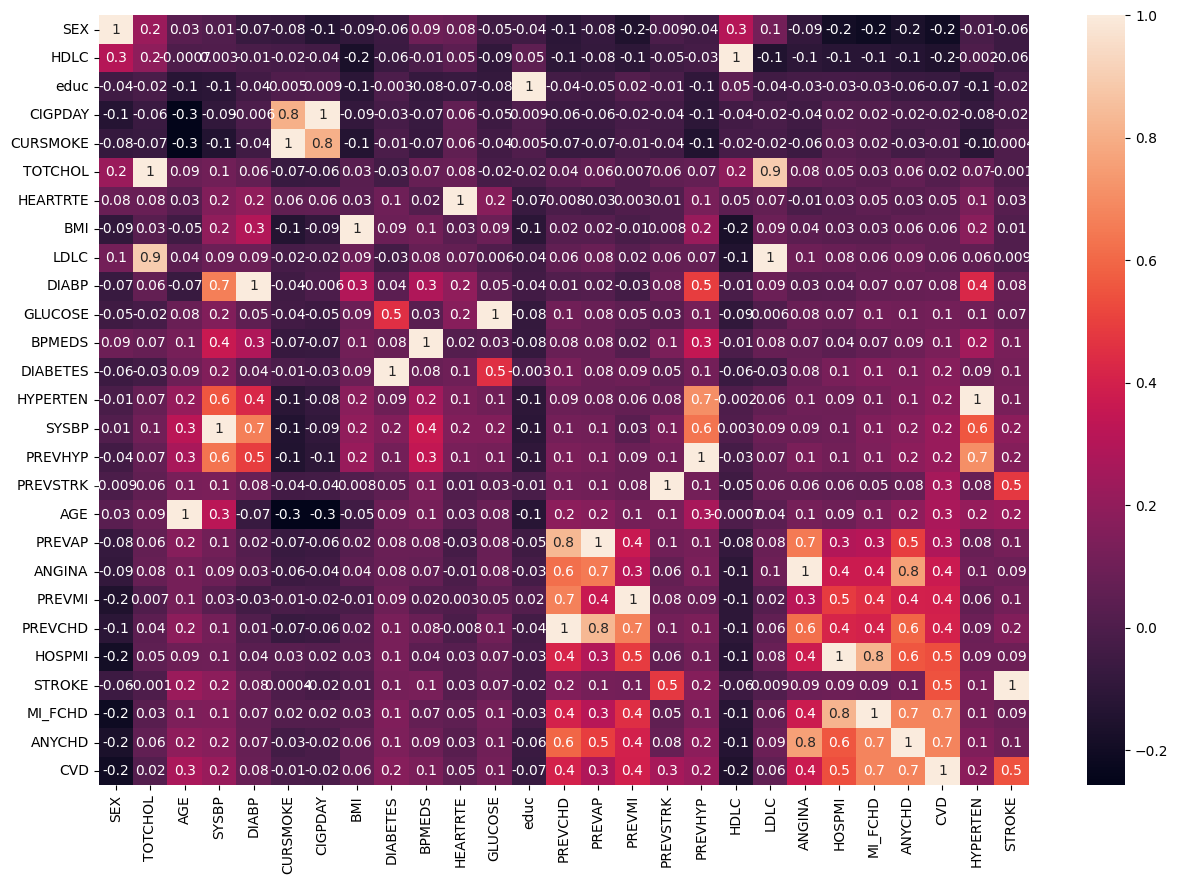

In [41]:
plt.figure(figsize=(15,10))

sns.heatmap(corr,annot=True,fmt=".1g")

### With oversampling

In [44]:
from copy import deepcopy

In [45]:
over_sampler = SMOTE()

X_over,y_over = deepcopy(X),deepcopy(y)

X_over,y_over = over_sampler.fit_resample(X_over,y_over)



In [57]:
np.unique(y_over,return_counts=True),np.unique(y,return_counts=True)

((array([0, 1]), array([1713, 1713])), (array([0, 1]), array([1713,  523])))

In [59]:
X_o_train,X_o_test,y_o_train,y_o_test = train_test_split(X_over,y_over,random_state=123,test_size=.2)

scaler_o = StandardScaler()

scaler_o.fit(X_o_train)
X_o_train = scaler_o.transform(X_o_train)
X_o_test = scaler_o.transform(X_o_test)



In [60]:
model_over = LogisticRegression()

model_over = model_over.fit(X_o_train,y_o_train)

o_train_score,o_test_score = model_over.score(X_o_train,y_o_train),model_over.score(X_o_test,y_o_test)

In [61]:
o_train_score,o_test_score

(0.972992700729927, 0.9810495626822158)

In [62]:
train_score,test_score

(0.9720357941834452, 0.9642857142857143)

In [52]:
o_prediction = model_over.predict(X_o_test)
n_prediction = model.predict(X_test)

In [53]:
conf_m_o = confusion_matrix(y_o_test,o_prediction)
conf_m_n = confusion_matrix(y_test,n_prediction)

In [54]:
conf_m_o

array([[318,  21],
       [ 41, 306]])

In [55]:
conf_m_n

array([[341,   9],
       [  7,  91]])

In [56]:
df_3_no_missings

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,PREVHYP,HDLC,LDLC,ANGINA,HOSPMI,MI_FCHD,ANYCHD,CVD,HYPERTEN,STROKE
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,...,0,54.0,141.0,0,0,0,0,0,0,0
14,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,...,1,46.0,135.0,0,0,1,1,1,1,0
19,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,...,0,34.0,286.0,0,0,0,0,0,1,0
22,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,...,1,44.0,236.0,0,0,0,0,0,1,0
25,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,...,1,48.0,163.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,243.0,68,110.0,66.0,0,0.0,24.30,0,0.0,...,1,65.0,178.0,0,0,0,0,0,1,0
11606,1,219.0,70,163.5,75.0,0,0.0,25.26,0,0.0,...,1,50.0,169.0,0,0,0,0,1,1,1
11615,2,228.0,60,205.0,100.0,1,20.0,22.37,0,0.0,...,1,47.0,181.0,0,0,0,0,0,1,0
11618,2,251.0,56,145.0,92.0,1,35.0,21.97,0,1.0,...,1,70.0,181.0,0,0,0,0,0,1,0


### With undersampling

In [73]:
X_under,y_under = deepcopy(X),deepcopy(y)

undersampler = ClusterCentroids()
X_under,y_under = undersampler.fit_resample(X_under,y_under)

print(np.unique(y_under,return_counts=True))

X_u_train,X_u_test,y_u_train,y_u_test = train_test_split(X_under,y_under,random_state=123,test_size=123)



scaler_u = StandardScaler()

scaler_u.fit(X_u_train)

X_u_train = scaler_u.transform(X_u_train)
X_u_test = scaler_u.transform(X_u_test)

(array([0, 1]), array([523, 523]))


In [69]:
model_u = LogisticRegression()

model_u =  model_u.fit(X_u_train,y_u_train)

In [70]:
score_u_train,score_u_test = model_u.score(X_u_train,y_u_train),model_u.score(X_u_test,y_u_test)

In [72]:
print(f"Missinga values have been droped:\n\tOriginal data: [train score: {train_score}, test score: {test_score}]\
                                         \n\tOversampled with SMOTE: [train score: {o_train_score}, test score: {o_test_score}]\
                                         \n\tUndersamped with ClusterCentroids: [train score: {score_u_train}, test score: {score_u_test}")

Missinga values have been droped:
	Original data: [train score: 0.9720357941834452, test score: 0.9642857142857143]                                         
	Oversampled with SMOTE: [train score: 0.972992700729927, test score: 0.9810495626822158]                                         
	Undersamped with ClusterCentroids: [train score: 0.9924160346695557, test score: 0.983739837398374


In [77]:
prediction_u = model_u.predict(X_u_train)
confusion_matrix(y_u_train,prediction_u)

array([[456,   8],
       [  1, 458]])

### Decision tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [115]:

perform_dict = {}

for name,sample in zip(["Original","SMOTE","ClusterCentriods"],[[X,y],[X_over,y_over],[X_under,y_under]]):

    X_s,y_s = sample

    X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s)

    scaler_s = StandardScaler()
    scaler_s = scaler_s.fit(X_s_train)
    X_s_train = scaler_s.transform(X_s_train)
    X_s_test = scaler_s.transform(X_s_test)

    tree = DecisionTreeClassifier()

    tree = tree.fit(X_s_train,y_s_train)

    perform_dict[name] = pd.DataFrame({features[i]:[tree.feature_importances_[i]] for i in range(len(features))}).T.reset_index().\
                        rename(columns={"index":"Feature",0:"Importance"}).sort_values("Importance")

    train_score_s,test_score_s = tree.score(X_s_train,y_s_train),tree.score(X_s_test,y_s_test)
    print(f"Missinga values have been droped, Decisoin tree:\n\t{name} data: [train score: {train_score_s}, test score: {test_score_s}]\n")

    

Missinga values have been droped, Decisoin tree:
	Original data: [train score: 1.0, test score: 0.9516994633273703]

Missinga values have been droped, Decisoin tree:
	SMOTE data: [train score: 1.0, test score: 0.9754959159859977]

Missinga values have been droped, Decisoin tree:
	ClusterCentriods data: [train score: 1.0, test score: 0.9809160305343512]



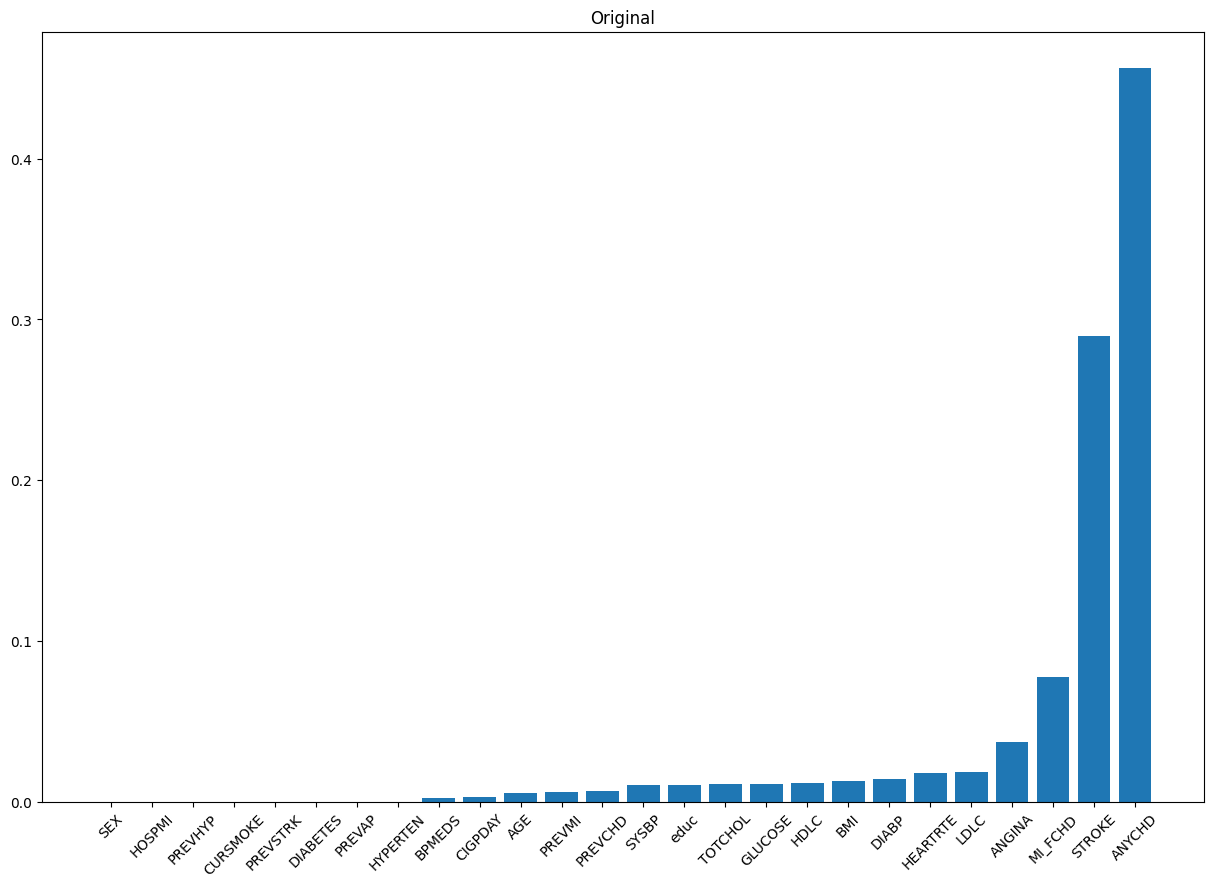

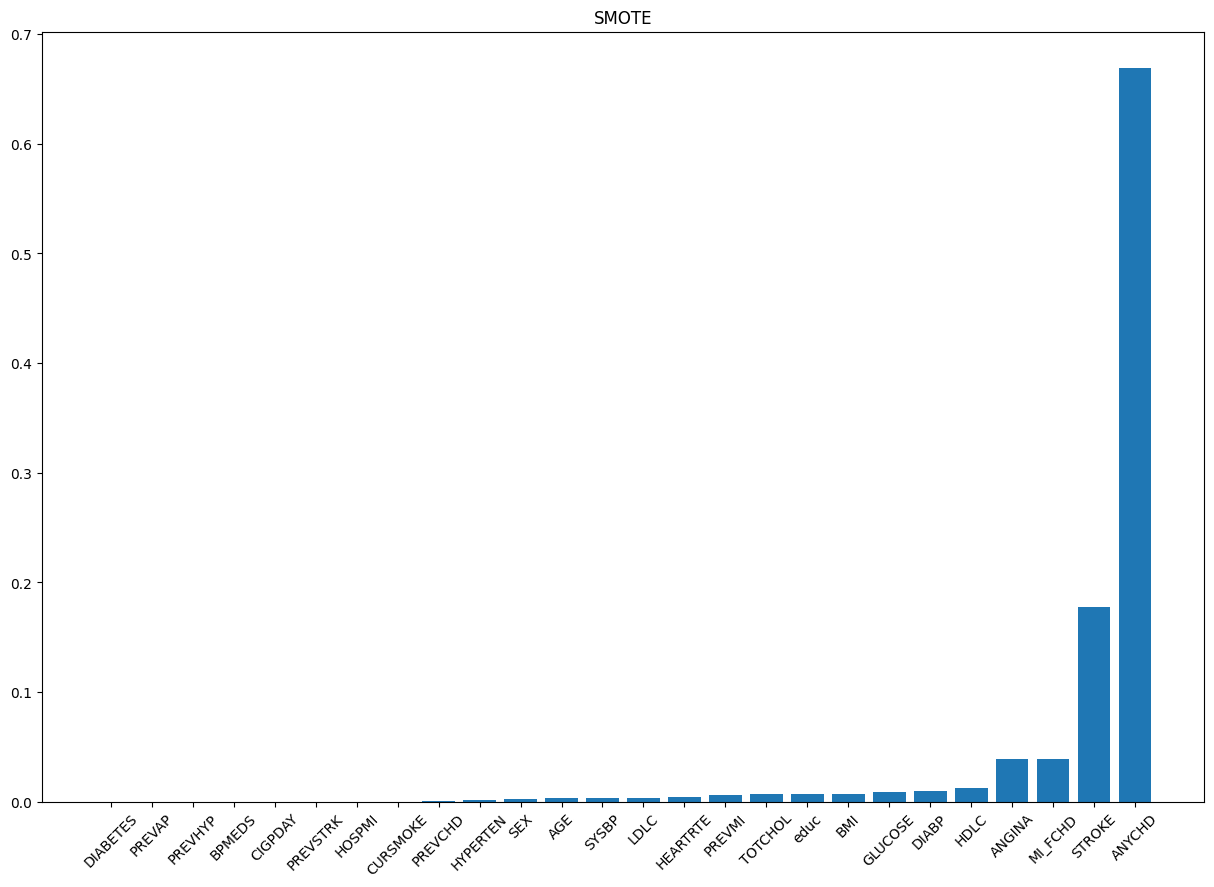

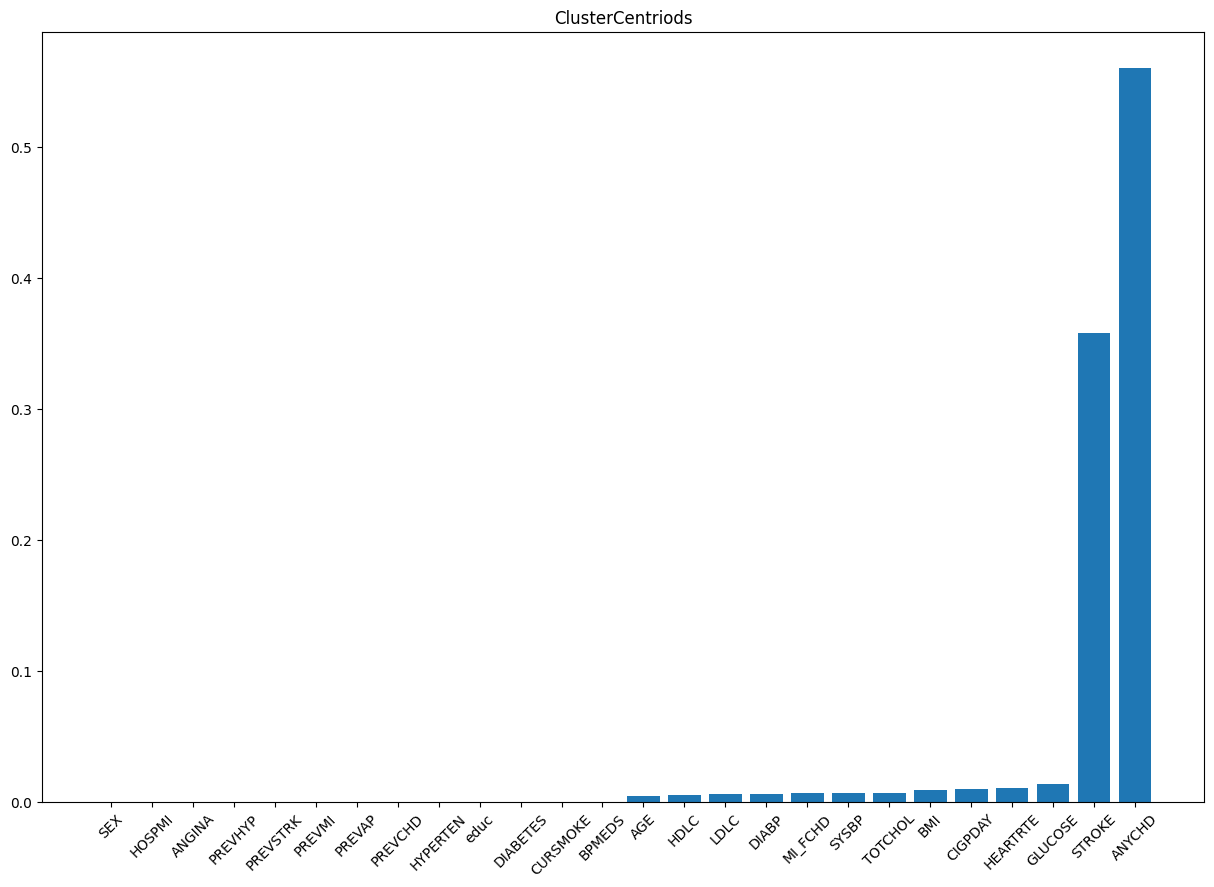

In [116]:
for t in perform_dict:

    ddf = perform_dict[t]
    
    plt.figure(figsize=(15,10))
    plt.bar(ddf['Feature'],ddf['Importance'])
    plt.xticks(rotation=45)
    plt.title(t)
    plt.show()
    

### Imputation

In [79]:
from sklearn.impute import KNNImputer

In [129]:
imputer = KNNImputer()

X_imp,y_imp = df_3.drop("CVD",axis=1).values,df_3['CVD'].values

X_imp_train,X_imp_test,y_imp_train,y_imp_test = train_test_split(X_imp,y_imp,random_state=123,test_size=.2)

imputer = imputer.fit(X_imp_train)
X_imp_train = imputer.transform(X_imp_train)
X_imp_test = imputer.transform(X_imp_test)

scaler_im = StandardScaler()

scaler_im = scaler_im.fit(X_imp_train)
X_imp_train = scaler_im.transform(X_imp_train)

X_imp_test = scaler_im.transform(X_imp_test)

In [130]:
log_imp = LogisticRegression()

log_imp = log_imp.fit(X_imp_train,y_imp_train)

In [131]:
imp_log_train_score = log_imp.score(X_imp_train,y_imp_train)
imp_log_test_score = log_imp.score(X_imp_test,y_imp_test)

In [133]:
imp_log_train_score,imp_log_test_score*100

(0.9712643678160919, 96.63093415007657)

In [134]:
train_score,test_score*100

(0.9720357941834452, 96.42857142857143)

In [137]:
y_imp_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [138]:
conf_mat_imp = log_imp.predict(X_imp_test)

conf_mat_imp = confusion_matrix(y_imp_test,conf_mat_imp)

In [139]:
conf_mat_imp

array([[481,   9],
       [ 13, 150]])